# Load the dataset into the tool

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#  Perform Below Visualizations
# ∙ Univariate Analysis
# ∙ Bi- Variate Analysis
# ∙ Multi-Variate Analysis

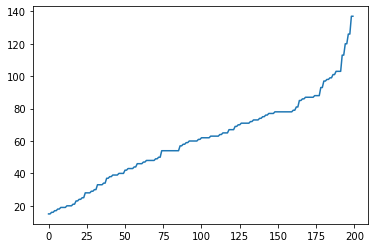

In [4]:
plt.plot(df['Annual Income (k$)'])
plt.show()

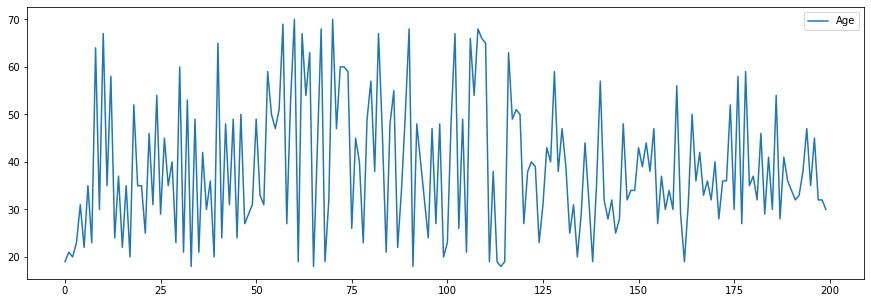

In [5]:
rcParams['figure.figsize']=[15,5]
df.Age.plot()
plt.legend(['Age'])
plt.show()

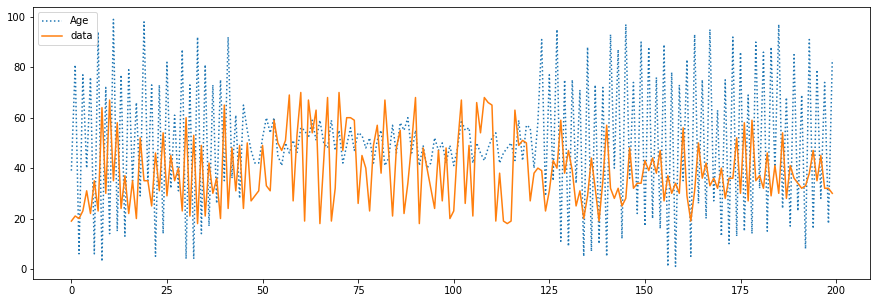

In [6]:
data=np.array(df['Spending Score (1-100)'])
plt.plot(data,linestyle = 'dotted')
df.Age.plot()
plt.legend(['Age','data'])
plt.show()

<AxesSubplot:>

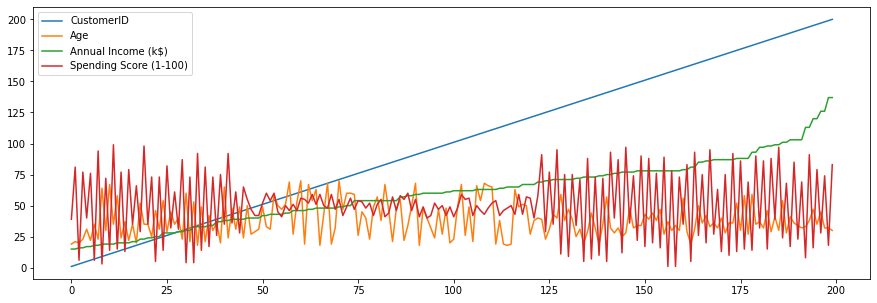

In [7]:
df.plot()

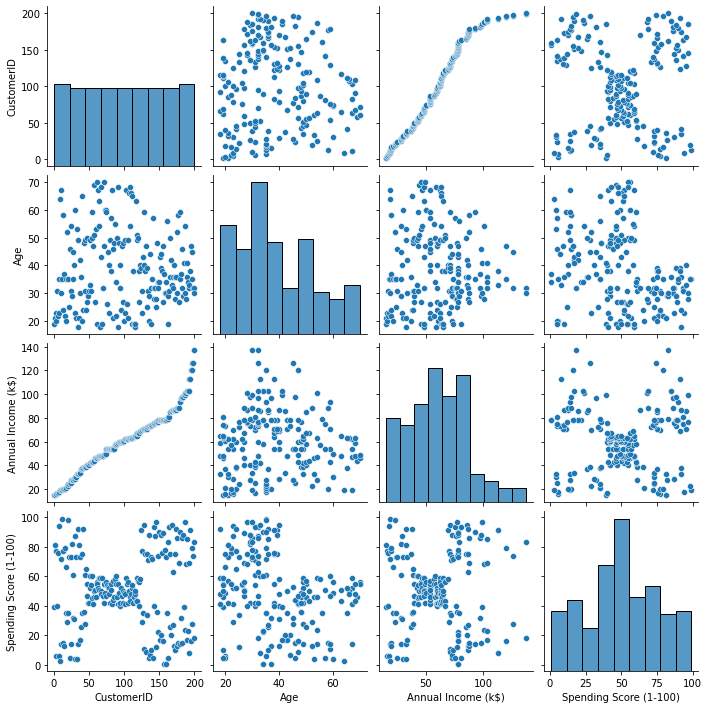

In [8]:
sns.pairplot(df)


# Perform descriptive statistics on the dataset

<AxesSubplot:>

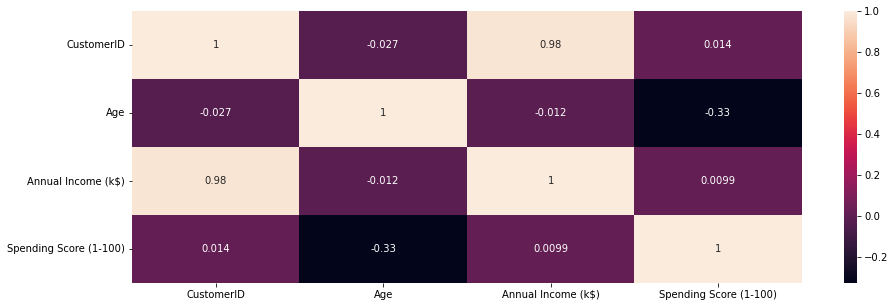

In [9]:
sns.heatmap(df.corr(),annot=True)

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Check for Missing values and deal with them

In [11]:
df.isna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [12]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [13]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Find the outliers and replace them outliers

<AxesSubplot:>

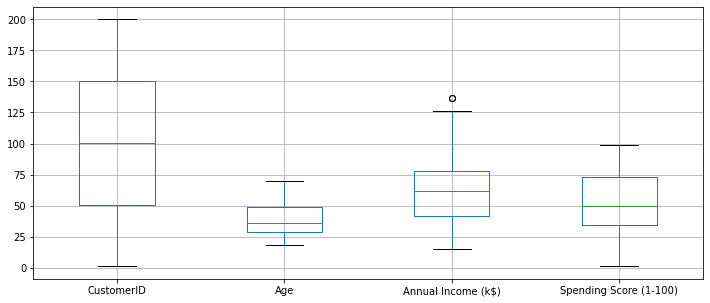

In [14]:
rcParams['figure.figsize']=[12,5]
df.boxplot()

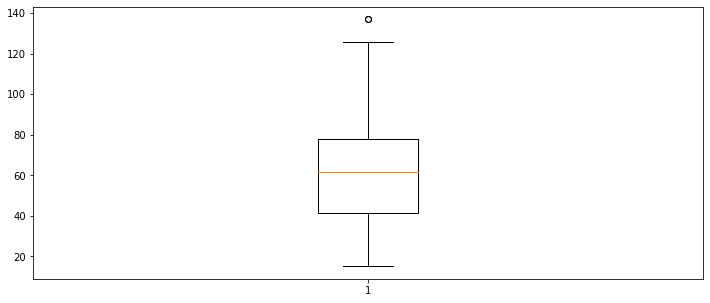

In [15]:
plt.boxplot(df['Annual Income (k$)'])
plt.show()

In [16]:
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3-Q1
upperLimit = Q3 + 1.5*IQR
lowerLimit = Q1 - 1.5*IQR
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']<lowerLimit,df['Annual Income (k$)'].median(),df['Annual Income (k$)'])
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']>upperLimit,df['Annual Income (k$)'].median(),df['Annual Income (k$)'])

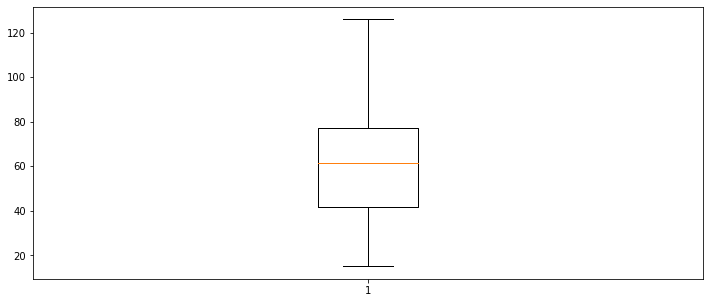

In [17]:
plt.boxplot(df['Annual Income (k$)'])
plt.show()

# Check for Categorical columns and perform encoding

In [18]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15.0,39
1,2,Male,21,15.0,81
2,3,Female,20,16.0,6
3,4,Female,23,16.0,77
4,5,Female,31,17.0,40


In [19]:
numeric_data = df.select_dtypes(include=[np.number]) 
categorical_data = df.select_dtypes(exclude=[np.number]) 
print("Number of numerical variables: ", numeric_data.shape[1]) 
print("Number of categorical variables: ", categorical_data.shape[1])

Number of numerical variables:  4
Number of categorical variables:  1


In [20]:
print("Number of categorical variables: ", categorical_data.shape[1]) 
Categorical_variables = list(categorical_data.columns)
Categorical_variables

Number of categorical variables:  1


['Gender']

In [21]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['Gender'])
df["Gender"] = label

In [23]:
df['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

# Scaling the data

In [24]:
X = df.drop("Age",axis=1)
Y = df['Age']

In [25]:
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
scale = object.fit_transform(X) 
print(scale)

[[-1.7234121   1.12815215 -1.78877673 -0.43480148]
 [-1.70609137  1.12815215 -1.78877673  1.19570407]
 [-1.68877065 -0.88640526 -1.74885313 -1.71591298]
 [-1.67144992 -0.88640526 -1.74885313  1.04041783]
 [-1.6541292  -0.88640526 -1.70892954 -0.39597992]
 [-1.63680847 -0.88640526 -1.70892954  1.00159627]
 [-1.61948775 -0.88640526 -1.66900594 -1.71591298]
 [-1.60216702 -0.88640526 -1.66900594  1.70038436]
 [-1.5848463   1.12815215 -1.62908235 -1.83237767]
 [-1.56752558 -0.88640526 -1.62908235  0.84631002]
 [-1.55020485  1.12815215 -1.62908235 -1.4053405 ]
 [-1.53288413 -0.88640526 -1.62908235  1.89449216]
 [-1.5155634  -0.88640526 -1.58915875 -1.36651894]
 [-1.49824268 -0.88640526 -1.58915875  1.04041783]
 [-1.48092195  1.12815215 -1.58915875 -1.44416206]
 [-1.46360123  1.12815215 -1.58915875  1.11806095]
 [-1.4462805  -0.88640526 -1.54923515 -0.59008772]
 [-1.42895978  1.12815215 -1.54923515  0.61338066]
 [-1.41163905  1.12815215 -1.46938796 -0.82301709]
 [-1.39431833 -0.88640526 -1.46

In [26]:
X_scaled  = pd.DataFrame(scale, columns = X.columns)
X_scaled

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
0,-1.723412,1.128152,-1.788777,-0.434801
1,-1.706091,1.128152,-1.788777,1.195704
2,-1.688771,-0.886405,-1.748853,-1.715913
3,-1.671450,-0.886405,-1.748853,1.040418
4,-1.654129,-0.886405,-1.708930,-0.395980
...,...,...,...,...
195,1.654129,-0.886405,2.403201,1.118061
196,1.671450,-0.886405,2.642742,-0.861839
197,1.688771,1.128152,2.642742,0.923953
198,1.706091,1.128152,0.067670,-1.250054


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.20, random_state=0)

In [28]:
X_train.shape

(160, 4)

In [29]:
X_test.shape

(40, 4)

In [30]:
Y_train.shape

(160,)

In [31]:
Y_test.shape

(40,)

In [32]:
x = df.iloc[:, [3, 4]].values 

# Perform any of the clustering algorithms


C:\a3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


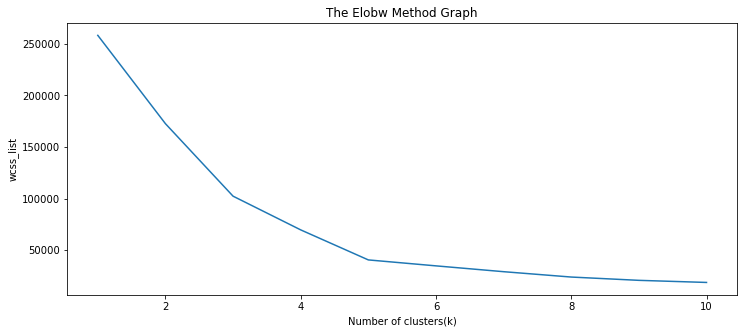

In [33]:
#KMeans
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

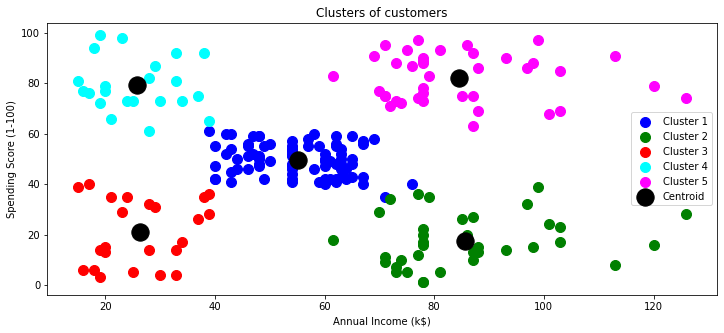

In [34]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x) 
#visulaizing the clusters  
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  